#**Assignment on Measures of Central Tendency and Dispersion**



In [1]:
import numpy as np
import pandas as pd


In [2]:
# Reading data to python

data=pd.read_csv("/content/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
# To understand the datatypes, null values & count

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**1. Find out how many males and females participated in the test.**


In [4]:
# To get the count of values in each gender

data['gender'].value_counts()


female    518
male      482
Name: gender, dtype: int64

In [5]:
##  Or

data.groupby('gender').size()

gender
female    518
male      482
dtype: int64

**2. What do you think about the students' parental level of education?**



In [6]:
# To get the unique count of differenet levals of education of parents in the column 'parental level of education'

data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [7]:
# to_frame() is used to convert the result to a dataframe

data['parental level of education'].value_counts().to_frame()

,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


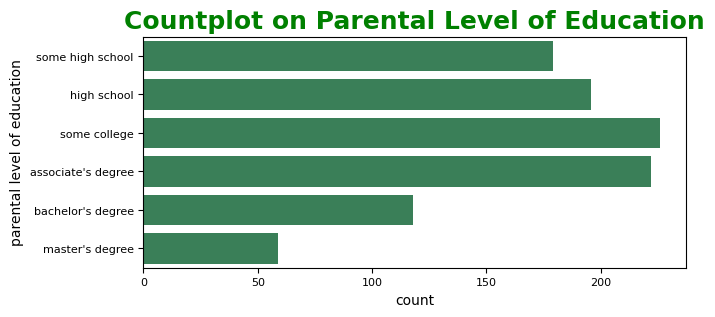

In [8]:
# Create a countplot on parental level of education

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,3))

sns.countplot(data=data['parental level of education'],color='seagreen')
plt.title('Countplot on Parental Level of Education',color='g',fontsize=18,fontweight='bold')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8);

**3. Who scores the most on average for math, reading and writing based on**

**● Gender**

**● Test preparation course**


In [9]:
# Average score of students based on Gender

data.groupby('gender').mean(['math score', 'reading score', 'writing score'])


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [10]:
# Average score of students based on test preparation course

data.groupby('test preparation course').mean(['math score', 'reading score', 'writing score'])

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [11]:
#Average score of students based on gender and test preparation course

data.groupby(['gender', 'test preparation course']).mean(['math score', 'reading score', 'writing score'])

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

**4. What do you think about the scoring variation for math, reading and writing based on**

**● Gender**

**● Test preparation course**


In [12]:
# The scoring variation of students based on 'math score' for the data grouped on both gender and test preparation course

data.groupby(['gender', 'test preparation course'])['math score'].describe()

count       mean        std   min    25%  \
gender test preparation course                                             
female completed                184.0  67.108696  14.428233  23.0  58.75   
       none                     334.0  61.320359  16.510686   0.0  52.00   
male   completed                174.0  72.988506  14.039164  39.0  63.00   
       none                     308.0  66.467532  14.335746  27.0  57.00   

                                 50%   75%    max  
gender test preparation course                     
female completed                67.0  76.0   99.0  
       none                     62.0  73.0  100.0  
male   completed                74.0  82.0  100.0  
       none                     67.0  76.0   97.0

In [13]:
# The scoring variation of students based on 'reading score' for the data grouped on both gender and test preparation course

data.groupby(['gender', 'test preparation course'])['reading score'].describe()

count       mean        std   min   25%   50%  \
gender test preparation course                                                  
female completed                184.0  77.375000  12.695493  40.0  70.0  78.0   
       none                     334.0  69.955090  14.636981  17.0  61.0  71.0   
male   completed                174.0  70.793103  13.612420  37.0  62.0  72.0   
       none                     308.0  62.581169  13.595718  23.0  54.0  63.0   

                                 75%    max  
gender test preparation course               
female completed                86.0  100.0  
       none                     80.0  100.0  
male   completed                81.0  100.0  
       none                     73.0   96.0

In [14]:
# The scoring variation of students based on 'writing score' for the data grouped on both gender and test preparation course

data.groupby(['gender', 'test preparation course'])['writing score'].describe()

count       mean        std   min   25%   50%  \
gender test preparation course                                                  
female completed                184.0  78.793478  12.240788  36.0  72.0  79.0   
       none                     334.0  68.982036  15.016497  10.0  60.0  70.0   
male   completed                174.0  70.339080  12.887910  38.0  62.0  71.0   
       none                     308.0  59.551948  13.468284  15.0  51.0  60.0   

                                  75%    max  
gender test preparation course                
female completed                87.25  100.0  
       none                     79.00  100.0  
male   completed                79.00  100.0  
       none                     69.00   92.0

In [15]:
# To get the std of scores of the data grouped on gender and test preparetion course

scr_std = data.groupby(['gender', 'test preparation course']).std(numeric_only=True)
scr_std

math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284

In [16]:
#To get the variance of scores of the data grouped on gender and test preparetion course   (var=sqrt(std))

scr_var = data.groupby(['gender', 'test preparation course']).var(numeric_only=True)
scr_var

math score  reading score  writing score
gender test preparation course                                          
female completed                208.173913     161.175546     149.836897
       none                     272.602767     214.241220     225.495172
male   completed                197.098133     185.297987     166.098233
       none                     205.513600     184.843553     181.394687

**5. The management needs your help to give bonus points to the top 25% of**
**students based on their math score, so how will you help the management to achieve this.**



In [17]:
#### Method 1

#  First get the value of Q3 (Quantile)
Q3=data['math score'].quantile(0.75)

#  Select only those students where math score is greater than or equal to Q3
top_stdts=data[data['math score']>=Q3]
top_stdts

#  Here we got 255 rows in top_stdts. So take last 250 students
top_stdts.tail(int(len(data)*0.25))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
419,female,group C,bachelor's degree,standard,none,77,88,87
420,female,group C,bachelor's degree,standard,completed,77,94,95
421,female,group C,some college,free/reduced,none,77,90,91
422,female,group C,some high school,standard,completed,77,90,85
423,female,group C,some high school,standard,none,77,91,88
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [18]:
#### Method 2

# sort the whole data based on math score

dt=data['math score'].sort_values(ascending=False).to_frame()

dt.head(250)

,math score
999,100
996,100
515,100
517,100
516,100
...,...
856,77
855,77
854,77
853,77


In [19]:
### Method 3   (the method is similar to Method 1, here we use the library statistics to get the quantile value )

import statistics as stat

quartiles = stat.quantiles(data['math score'], n=4)
quartiles

[57.0, 66.0, 77.0]

In [20]:
# to get the last quantile alone

high_score=quartiles[-1]
high_score

77.0

In [21]:
#  Select only those students where math score is greater than or equal to 'high_score'

top_stdts=data[data['math score']>=high_score]
top_stdts

#  Here we got 255 rows in top_stdts. So take last 250 students
top_stdts.tail(int(len(data)*0.25))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
419,female,group C,bachelor's degree,standard,none,77,88,87
420,female,group C,bachelor's degree,standard,completed,77,94,95
421,female,group C,some college,free/reduced,none,77,90,91
422,female,group C,some high school,standard,completed,77,90,85
423,female,group C,some high school,standard,none,77,91,88
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
